<a href="https://colab.research.google.com/github/francianerod/meteoblue-do-BRASIL/blob/main/Ferramenta_mapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Comando de abertura para Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
mapa = gpd.read_file('/content/drive/MyDrive/Mapas/BR_RG_Imediatas_2021/BR_RG_Imediatas_2021.shp')
mapa.head()

,CD_RGI,NM_RGI,SIGLA,geometry
0,110001,Porto Velho,RO,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,110002,Ariquemes,RO,"POLYGON ((-62.48851 -8.73008, -62.48495 -8.737..."
2,110003,Jaru,RO,"POLYGON ((-62.22055 -8.59088, -62.21053 -8.592..."
3,110004,Ji-Paraná,RO,"POLYGON ((-61.57450 -9.72063, -61.57414 -9.721..."
4,110005,Cacoal,RO,"POLYGON ((-61.00060 -10.99224, -61.00059 -10.9..."


In [ ]:
#mapa.query("SIGLA =='PR'")

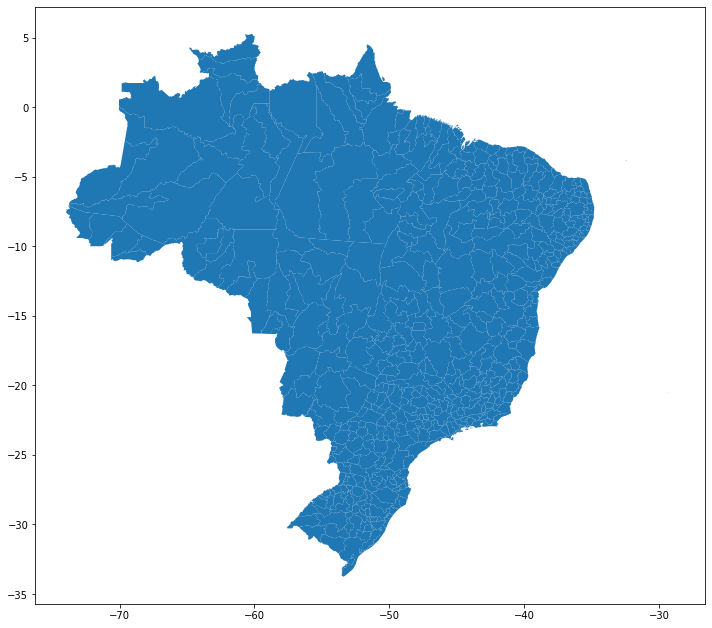

In [ ]:
mapa.plot(figsize=(12,12))
plt.show()

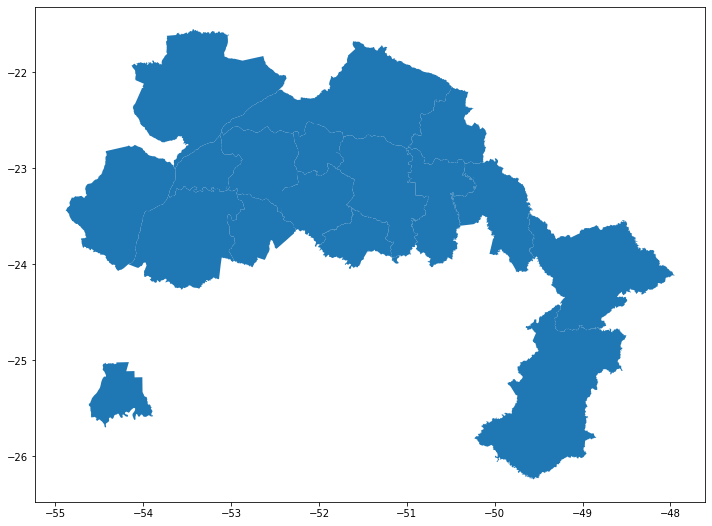

In [ ]:
rgs = mapa[mapa.NM_RGI.isin(['Maringá', 'Cianorte', 'Londrina', 'Cornélio Procópio ¿ Bandeirantes', 'Curitiba', 'Umuarama',
                               'Paranacity - Colorado','Santo Antônio da Platina','Foz do Iguaçu','Paranavaí', 'Loanda',
                               'Apucarana','Nova Andradina', 'Naviraí - Mundo Novo',
                               'Assis', 'Itapeva','Presidente Prudente'])]
rgs.plot(figsize=(12,12))
plt.show()

In [ ]:
mapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_RGI    512 non-null    object  
 1   NM_RGI    512 non-null    object  
 2   SIGLA     512 non-null    object  
 3   geometry  512 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 16.1+ KB


In [ ]:
rgs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17 entries, 311 to 465
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_RGI    17 non-null     object  
 1   NM_RGI    17 non-null     object  
 2   SIGLA     17 non-null     object  
 3   geometry  17 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 680.0+ bytes


In [ ]:
# União dos dataframe
uniao = mapa.merge(rgs, on = 'CD_RGI', how = "left")
uniao

,CD_RGI,NM_RGI_x,SIGLA_x,geometry_x,NM_RGI_y,SIGLA_y,geometry_y
0,110001,Porto Velho,RO,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...",NaN,NaN,None
1,110002,Ariquemes,RO,"POLYGON ((-62.48851 -8.73008, -62.48495 -8.737...",NaN,NaN,None
2,110003,Jaru,RO,"POLYGON ((-62.22055 -8.59088, -62.21053 -8.592...",NaN,NaN,None
3,110004,Ji-Paraná,RO,"POLYGON ((-61.57450 -9.72063, -61.57414 -9.721...",NaN,NaN,None
4,110005,Cacoal,RO,"POLYGON ((-61.00060 -10.99224, -61.00059 -10.9...",NaN,NaN,None
...,...,...,...,...,...,...,...
507,520019,Luziânia,GO,"POLYGON ((-48.36249 -15.81871, -48.36217 -15.8...",NaN,NaN,None
508,520020,Águas Lindas de Goiás,GO,"POLYGON ((-47.12418 -14.54106, -47.12384 -14.5...",NaN,NaN,None
509,520021,Posse-Campos Belos,GO,"POLYGON ((-46.41378 -12.82825, -46.41353 -12.8...",NaN,NaN,None
510,520022,Flores de Goiás,GO,"POLYGON ((-47.62526 -13.10926, -47.62500 -13.1...",NaN,NaN,None


In [ ]:
uniao.query("SIGLA_x =='PR'")

,CD_RGI,NM_RGI_x,SIGLA_x,geometry_x,NM_RGI_y,SIGLA_y,geometry_y
361,410001,Curitiba,PR,"POLYGON ((-49.25710 -24.42878, -49.25667 -24.4...",Curitiba,PR,"POLYGON ((-49.25710 -24.42878, -49.25667 -24.4..."
362,410002,Paranaguá,PR,"MULTIPOLYGON (((-48.40736 -25.84270, -48.40750...",NaN,NaN,None
363,410003,União da Vitória,PR,"POLYGON ((-50.97271 -25.67787, -50.97180 -25.6...",NaN,NaN,None
364,410004,Guarapuava,PR,"POLYGON ((-51.27787 -24.77549, -51.27584 -24.7...",NaN,NaN,None
365,410005,Pitanga,PR,"POLYGON ((-51.94697 -24.24555, -51.94827 -24.2...",NaN,NaN,None
366,410006,Cascavel,PR,"POLYGON ((-53.23996 -24.33868, -53.23874 -24.3...",NaN,NaN,None
367,410007,Foz do Iguaçu,PR,"POLYGON ((-54.16919 -25.03317, -54.17470 -25.0...",Foz do Iguaçu,PR,"POLYGON ((-54.16919 -25.03317, -54.17470 -25.0..."
368,410008,Toledo,PR,"POLYGON ((-53.97383 -24.03664, -53.97830 -24.0...",NaN,NaN,None
369,410009,Francisco Beltrão,PR,"POLYGON ((-53.67326 -25.50508, -53.66502 -25.5...",NaN,NaN,None
370,410010,Pato Branco,PR,"POLYGON ((-52.76979 -25.60409, -52.76878 -25.6...",NaN,NaN,None


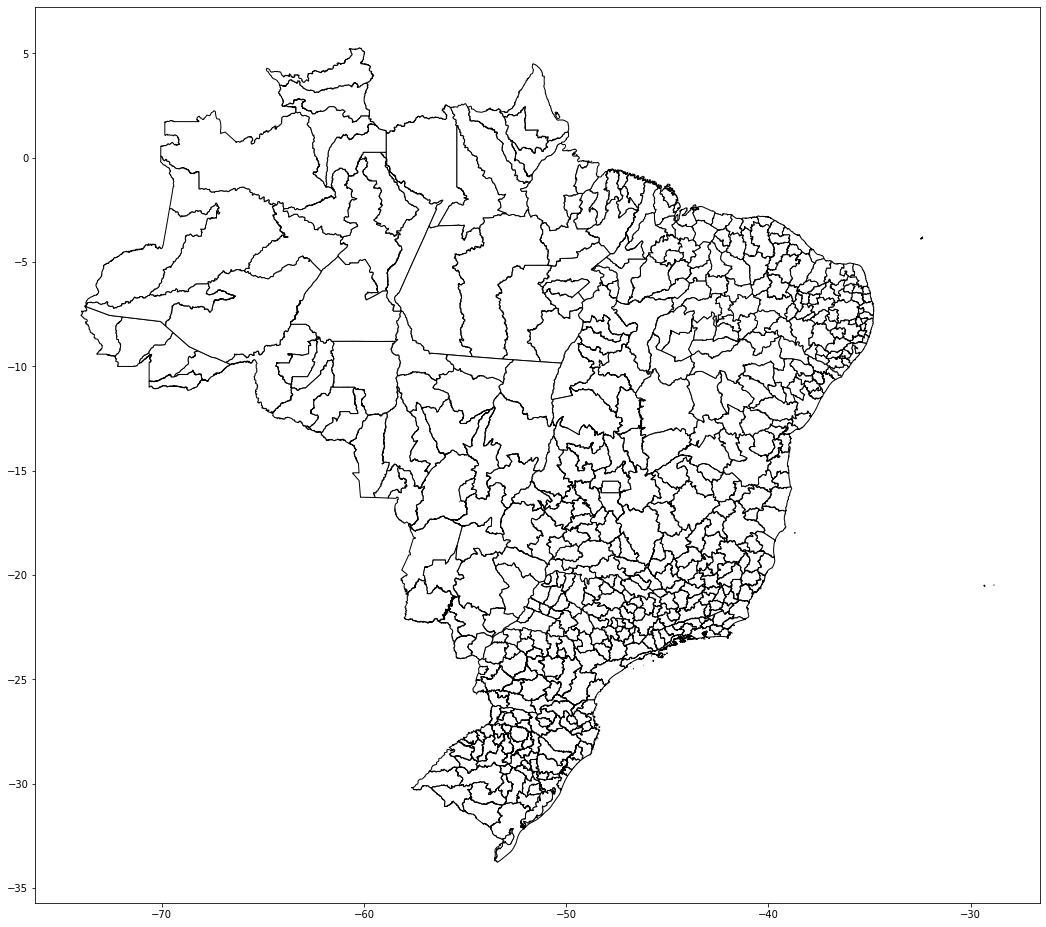

In [ ]:
ax = mapa.plot(color="white", edgecolor='black',figsize=(18,18))